## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [4]:
def resize(img,interp):
    if interp == 'nearest':
        near_img = misc.imresize(img, 20, interp)
        return near_img
    if interp == 'bilinear':
        bilinear_img = misc.imresize(img, 50, interp)
        return bilinear_img
    if interp == 'bicubic':
        bicubic_img = misc.imresize(img, 30, interp)
        return bicubic_img

Text(0.5,0.98,'Resize with bicubic function')

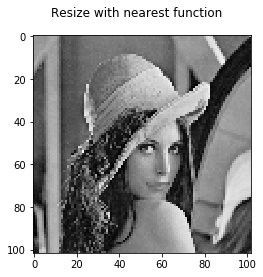

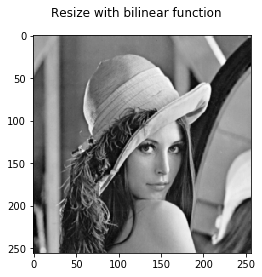

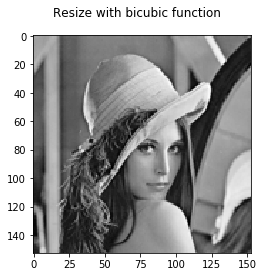

In [5]:
img_path = './images/'
img_name = 'lena-grey.bmp'
img_lena = io.imread(img_path.__add__(img_name))
img_lena_float = img_as_float(img_lena)
near_img = resize(img_lena_float,'nearest')
plt.imshow(near_img, cmap = plt.cm.gray)
plt.suptitle('Resize with nearest function')
plt.figure()
bilinear_img = resize(img_lena_float,'bilinear')
plt.imshow(bilinear_img, cmap = plt.cm.gray)
plt.suptitle('Resize with bilinear function')
plt.figure()
bicubic_img = resize(img_lena_float,'bicubic')
plt.imshow(bicubic_img, cmap = plt.cm.gray)
plt.suptitle('Resize with bicubic function')

In [8]:
def simple_blend(img1, img2):
    n1, m1 = img1.shape
    n2, m2 = img2.shape
    img_blend = np.zeros_like(img1)
    for i in img1:
        i[int(m1/2):] = 0
    for i in img2:
        i[:int(m2/2)] = 0
    img_blend = img1 + img2
    return img_blend    

def alpha_blend(img1, img2, window):
    n1, m1 = img1.shape
    n2, m2 = img2.shape
    img_blend = np.zeros(img1.shape)
    img_blend[:, :int(m1/2)-window] = img1[:, :int(m1/2)-window]
    img_blend[:, int(m2/2)+window:] = img2[:, int(m2/2)+window:]
    x1 = int(m1/2) - window
    x2 = int(m2/2) + window
    x = np.arange(x1,x2)
    alpha = x/(x1-x2) - x2/(x1-x2)
    img_blend[:,x1:x2] = alpha * img1[:,x1:x2] + (1 - alpha) * img2[:,x1:x2]
    return img_blend

def pyramid_blend(img1, img2):
    
    #Create a black image and white image
    white = np.zeros(img1.shape)
    black = np.ones(img1.shape)
    
    #Blend them
    mask = alpha_blend(black,white,20)
    
    #Transform it into gaussian mask
    G = tuple(transform.pyramid_gaussian(mask,6))
    L1 = tuple(transform.pyramid_laplacian(img1,6))
    L2 = tuple(transform.pyramid_laplacian(img2,6))
    L = []
    for i in range(len(L1)):
        L11 = (L1[i] * G[i]) 
        L12 = (L2[i] * (1 - G[i]))
        L.append(L11 + L12)
    #Delete the pyramid
    Ld = L[6]  
    for i in range(5,-1,-1):
        Ld = transform.pyramid_expand(Ld) 
        if Ld.shape > L[i].shape:
            Ld = np.delete(Ld, (-1), axis=0)
            Ld = np.delete(Ld, (-1), axis=1)
        Ld = Ld + L[i]
    return Ld

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


Text(0.5,0.98,'pyramid blending')

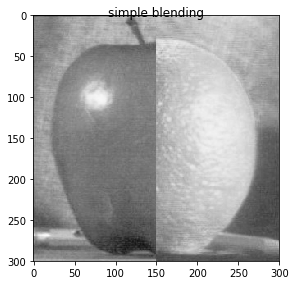

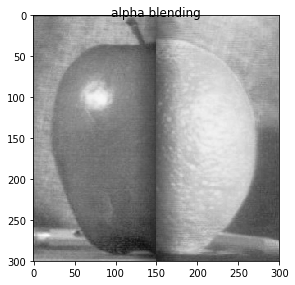

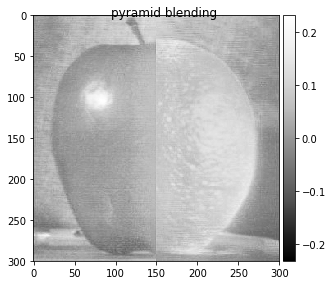

In [9]:
#i = blending(img_lena_float,img_lena_float, 'simple blending')
img_name_1 = 'apple.jpeg'
img_apple = io.imread(img_path.__add__(img_name_1),as_grey=True)
img_name_2 = 'orange.jpeg'
img_orange = io.imread(img_path.__add__(img_name_2),as_grey=True)
img_apple_float = img_as_float(img_apple)
img_orange_float = img_as_float(img_orange)

#Simple blending
img_blend_1 = simple_blend(img_apple_float, img_orange_float)
io.imshow(img_blend_1,cmap = cm.Greys_r)
plt.suptitle('simple blending')
plt.figure()

#Alpha blending
img_blend_2 = alpha_blend(img_apple_float, img_orange_float, 30)
io.imshow(img_blend_2,cmap = cm.Greys_r)
plt.suptitle('alpha blending')
plt.figure()

#Pyramid blending
img_blend_3 = pyramid_blend(img_apple_float, img_orange_float)
io.imshow(img_blend_3,cmap = cm.Greys_r)
plt.suptitle('pyramid blending')
